## Чирец Денис  
### 8 группа, ТВиМС  
### Отчёт по лабораторной работе 1



## Содержание
1. [Описание набора данных](#описание-набора-данных)  
2. [Расчёт описательных статистик](#расчёт-описательных-статистик)  
3. [Визуализация распределений](#визуализация-распределений)  
4. [Корреляционный анализ](#корреляционный-анализ)  
5. [Общие выводы](#общие-выводы)  


## Описание набора данных

В этом разделе производится загрузка и первичное изучение датасета (форма, первые строки, типы столбцов).  
При необходимости укажите корректный путь к файлу данных.


In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

DATA_PATH = '../data/Annual 2005-2011.csv'

In [2]:
def load_dataset(path: str):
    path = Path(path)
    df = pd.read_csv(path)
    return df

df = load_dataset(DATA_PATH)
print('Форма данных:', df.shape)
display(df.head(3))

print('\nИнформация о столбцах:')
print(df.info())

Форма данных: (2695, 22)


,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,...,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
0,6095.0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,...,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904,5.0
1,255.0,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,...,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647,5.0
2,114.0,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,...,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000,5.0



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   empl_num  2695 non-null   float64
 1   k1        2695 non-null   float64
 2   k2        2695 non-null   float64
 3   k3        2695 non-null   float64
 4   k4        2695 non-null   float64
 5   k5        2695 non-null   float64
 6   k6        2695 non-null   float64
 7   k7        2695 non-null   float64
 8   k8        2695 non-null   float64
 9   k9        2695 non-null   float64
 10  k10       2695 non-null   float64
 11  k11       2695 non-null   float64
 12  k12       2695 non-null   float64
 13  k13       2695 non-null   float64
 14  k14       2695 non-null   float64
 15  k15       2695 non-null   float64
 16  k16       2695 non-null   float64
 17  k17       2695 non-null   float64
 18  k18       2695 non-null   float64
 19  k19       2695 non-null   float64
 20  k20   

In [3]:
numeric_df = df.select_dtypes(include=[np.number]).copy()

nunique = numeric_df.nunique(dropna=False)
const_cols = nunique[nunique <= 1].index.tolist()
if const_cols:
    print('Предупреждение: найдены константные столбцы и исключены из анализа:', const_cols)
    numeric_df = numeric_df.drop(columns=const_cols)
else:
    print('Константных столбцов не обнаружено.')

print('Числовые столбцы для анализа:', list(numeric_df.columns))
display(numeric_df.head(3))


Константных столбцов не обнаружено.
Числовые столбцы для анализа: ['empl_num', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'k18', 'k19', 'k20', 'year']


,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,...,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
0,6095.0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,...,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904,5.0
1,255.0,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,...,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647,5.0
2,114.0,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,...,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000,5.0


## Расчёт описательных статистик

Считаем минимум, максимум, размах, среднее, дисперсию, стандартное отклонение, медиану и квантили уровней 0.01, 0.05, 0.95, 0.99.


In [4]:
# === Описательные статистики ===
desc = pd.DataFrame(index=numeric_df.columns)
desc['count'] = numeric_df.count()
desc['min'] = numeric_df.min()
desc['max'] = numeric_df.max()
desc['range'] = desc['max'] - desc['min']
desc['mean'] = numeric_df.mean()
desc['var'] = numeric_df.var(ddof=1)
desc['std'] = numeric_df.std(ddof=1)
desc['median'] = numeric_df.median()
desc['q01'] = numeric_df.quantile(0.01)
desc['q05'] = numeric_df.quantile(0.05)
desc['q95'] = numeric_df.quantile(0.95)
desc['q99'] = numeric_df.quantile(0.99)

desc = desc[['count','min','max','range','mean','var','std','median','q01','q05','q95','q99']]
display(desc.style.format(precision=4))


,count,min,max,range,mean,var,std,median,q01,q05,q95,q99
empl_num,2695,10.0000,28650.0000,28640.0000,1220.7733,6535214.0997,2556.4065,473.0000,36.9400,91.0000,5152.4000,12526.7800
k1,2695,0.2483,18.0201,17.7718,2.0021,2.8563,1.6901,1.4739,0.4234,0.6639,5.2580,9.0029
k2,2695,0.0000,7.0291,7.0291,0.2380,0.2680,0.5177,0.0556,0.0003,0.0027,1.1287,2.6365
k3,2695,0.0083,11.1877,11.1794,0.8251,0.8433,0.9183,0.5383,0.0614,0.1249,2.5447,4.9174
k4,2695,-4.5699,0.9359,5.5058,0.0381,0.3908,0.6252,0.1486,-2.4501,-0.9775,0.7558,0.8819
k5,2695,0.0099,1.0837,1.0738,0.3463,0.0392,0.1980,0.3199,0.0374,0.0683,0.7125,0.8601
k6,2695,0.0000,1.0000,1.0000,0.2380,0.0454,0.2131,0.1852,0.0000,0.0000,0.6636,0.8599
k7,2695,0.0000,1.0000,1.0000,0.1742,0.0498,0.2233,0.0757,0.0000,0.0000,0.6741,0.8900
k8,2695,0.0538,0.9901,0.9363,0.6560,0.0383,0.1958,0.6819,0.1609,0.2925,0.9327,0.9623
k9,2695,0.0593,199.6058,199.5465,6.8628,63.0953,7.9433,4.7590,0.4558,1.0489,19.6424,35.6715



-   **Размах и разброс.** Наибольший разброс у `empl_num`, `k9`, `k15`, `k16` и особенно `k17` (огромный размах и `std`). У `k2`, `k6`, `k7`, `k8` разброс небольшой - значения компактны.
    
-   **Среднее vs медиана.** Во многих признаках среднее заметно выше медианы (`k9`, `k10`, `k12`, `k13`, `k14`, `k15`, `k16`, `k17`) → **правосторонняя асимметрия** и длинные правые хвосты. Для `k18–k20` среднее ближе к медиане → распределения более симметричны.
    
-   **Хвосты и выбросы (квантили).**
    
    -   `k9`: q95≈19.6, q99≈35.7 при медиане ≈4.76 - выражённые **редкие большие значения**.
        
    -   `k15`: q95≈34.98, q99≈67.0 при медиане ≈9.85 - длинный правый хвост.
        
    -   `k16`: q95≈6.97, q99≈15.23 при медиане ≈1.24 - хвост присутствует.
        
    -   **`k17`**: q95≈288, q99≈4299 при медиане ≈20 → **крайние выбросы/иной масштаб**, искажают среднее.
        
    -   `k4`, `k18–k20` имеют и **отрицательные** значения; у них квантильные «хвосты» короче, распределения ближе к нормальным.
        
-   **Итог:** данные неоднородны по масштабу и форме; много признаков с правыми хвостами и выбросами. Для корректного дальнейшего анализа целесообразны:
    
    1.  **масштабирование/лог-преобразование** для «хвостатых» признаков,
        
    2.  проверка и при необходимости **обработка выбросов** (особенно `k17`),
        
    3.  использование **медианы/квантильных метрик** как более устойчивых к выбросам.

## Визуализация распределений

Построим гистограммы для каждого числового столбца и опишем форму распределений (симметрия, асимметрия, мультимодальность, выбросы).


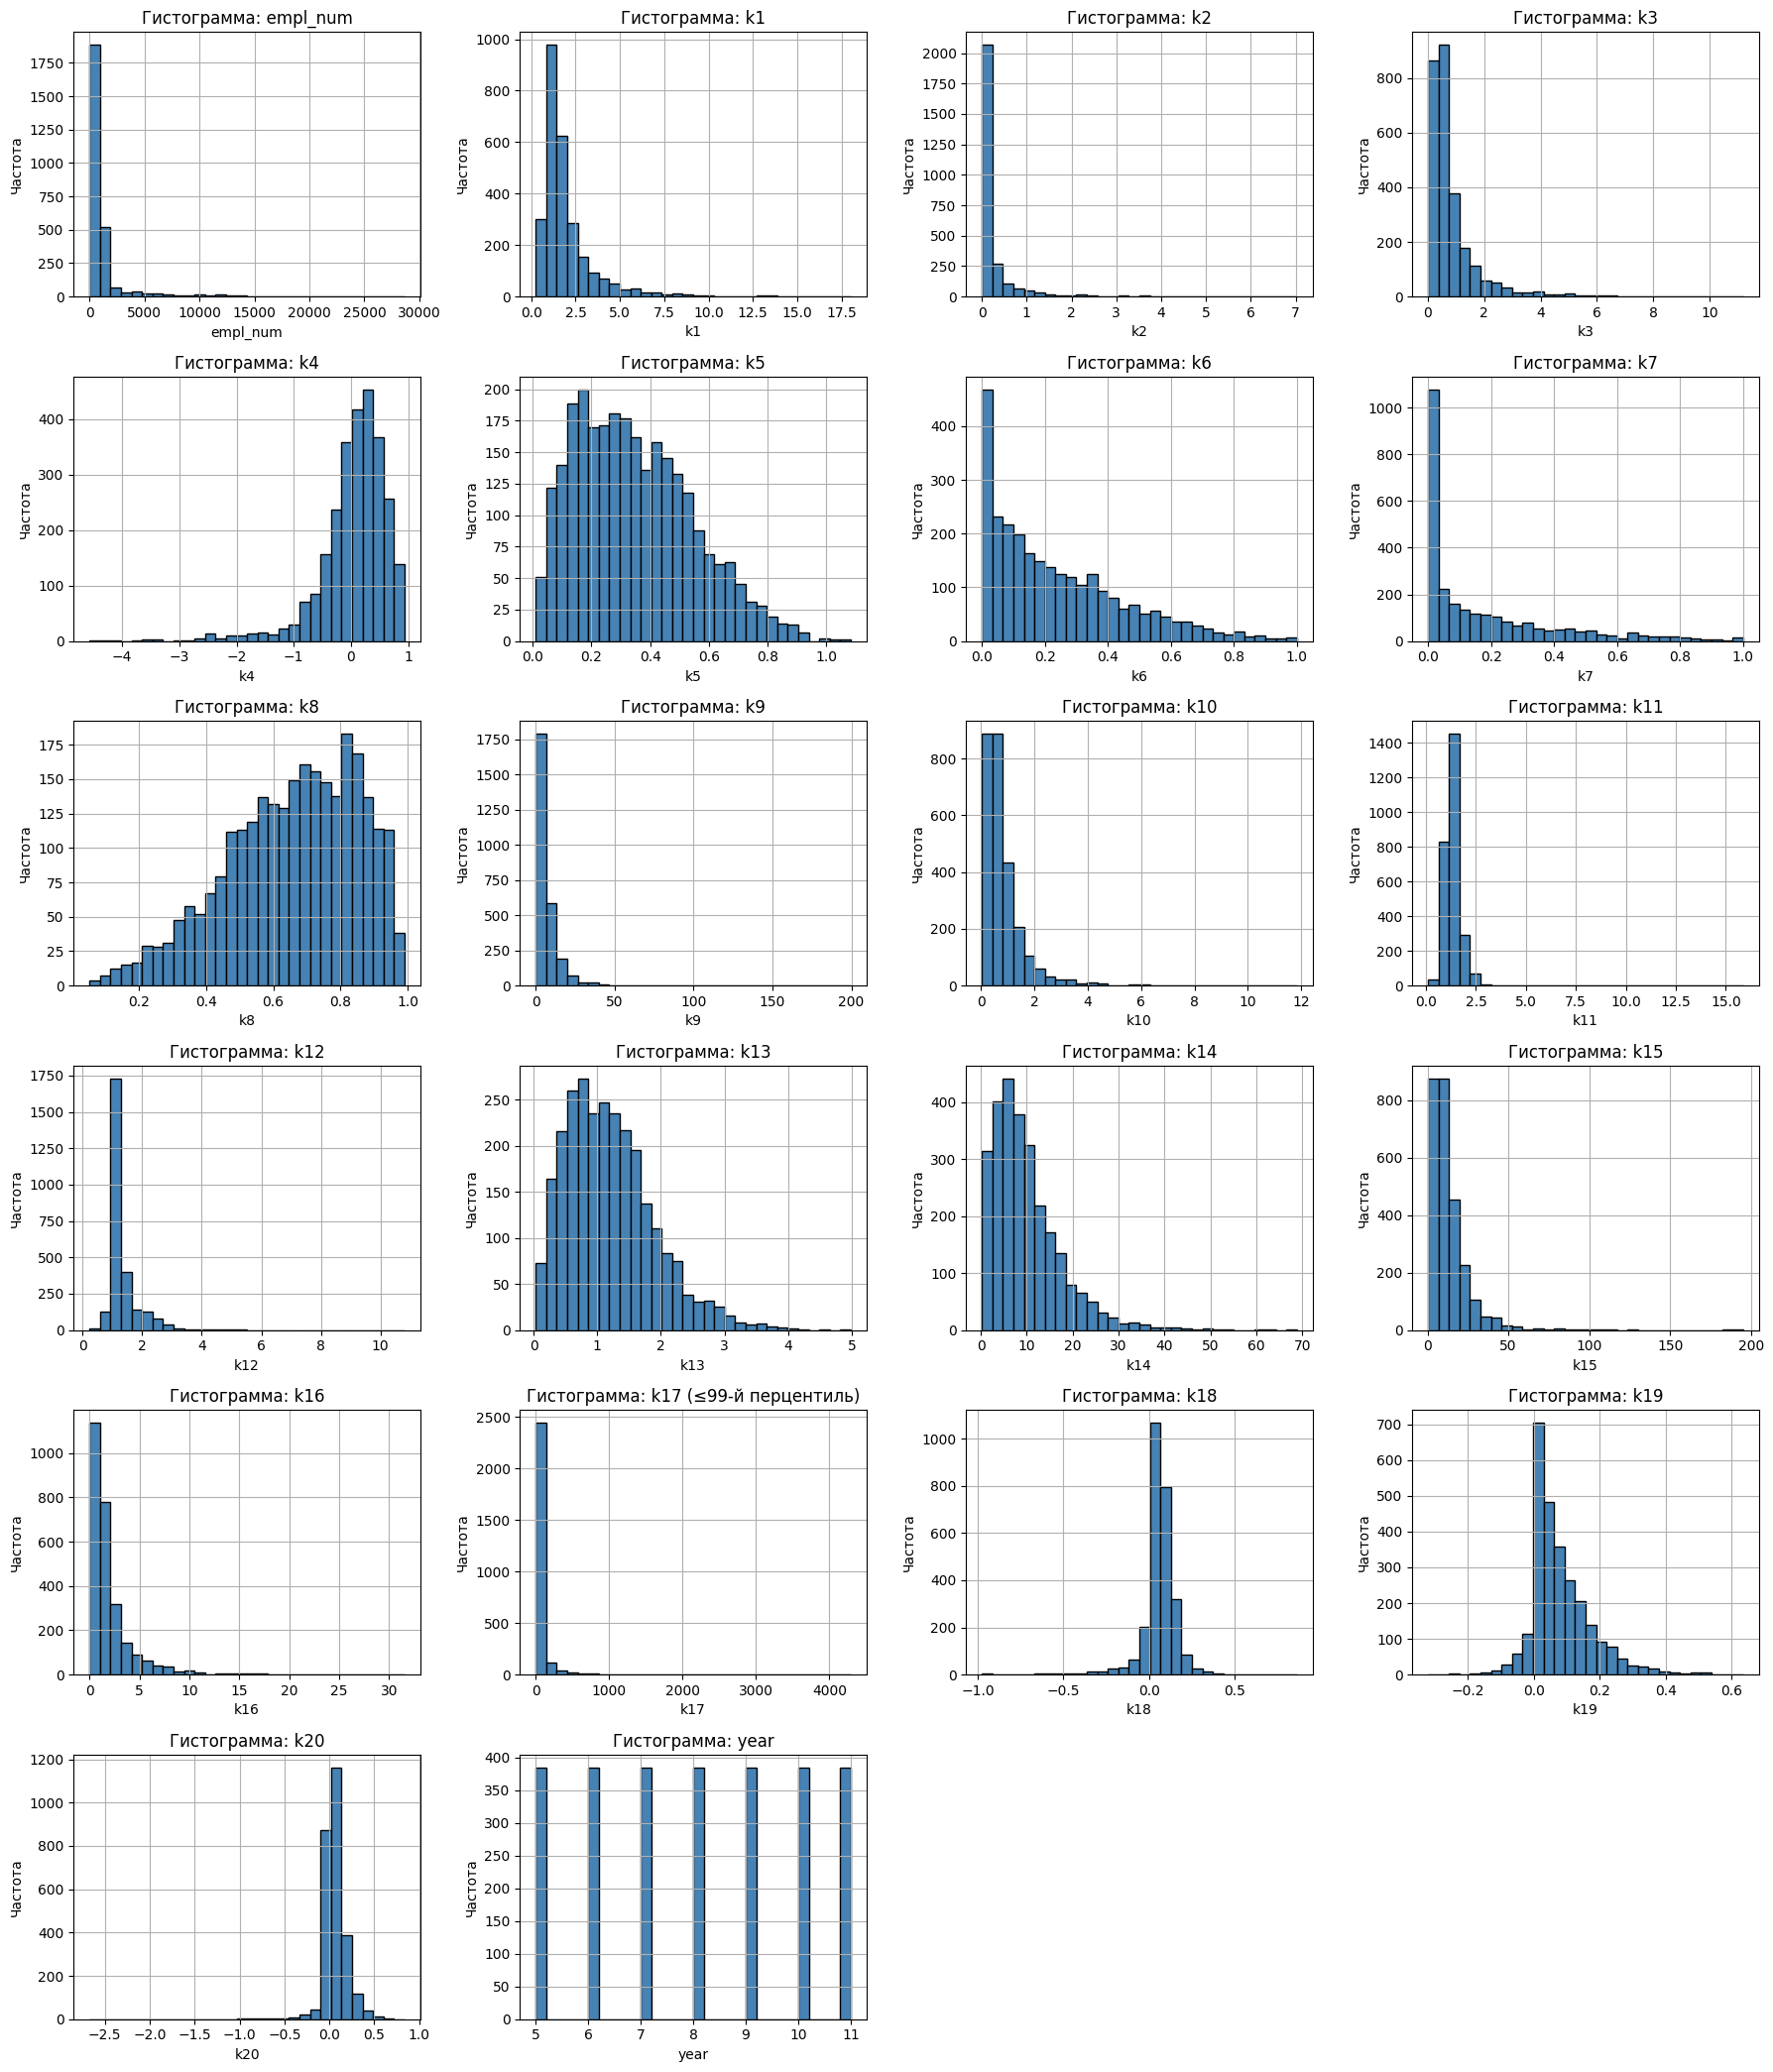

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

cols = list(numeric_df.columns)
n = len(cols)

if n == 0:
    print('Нет числовых столбцов для построения гистограмм.')
else:
    ncols = 4
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 3.5 * nrows))
    axes = np.array(axes).reshape(-1)

    for i, col in enumerate(cols):
        ax = axes[i]

        data = numeric_df[col].dropna()

        if col == 'k17':
            upper = np.percentile(data, 99)
            data = data[data <= upper]
            ax.set_title(f'Гистограмма: {col} (≤99-й перцентиль)')
        else:
            ax.set_title(f'Гистограмма: {col}')

        ax.hist(data, bins=30, color='steelblue', edgecolor='black')
        ax.set_xlabel(col)
        ax.set_ylabel('Частота')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



**Комментарий и вывод:**    
Большинство признаков распределены неравномерно и с перекосом вправо - это значит, что у большинства значений низкие показатели, а у небольшой части наблюдаются очень большие. Такое часто бывает с показателями эффективности, объёмов или доходов.  
  
**empl_num** - у большинства значения до 1000, но есть редкие выбросы до 30 000.  
  
**k1–k3, k6–k7, k9–k16** - похожи по форме: пик около нуля, длинный правый хвост.  
  
**k4** - ближе к нормальному распределению, немного смещено вправо.  
  
**k5, k8, k13** - выглядят достаточно равномерно, без выраженных выбросов.  
  
**k17** - после обрезки по 99-му перцентилю стало видно, что основная часть данных находится до 4000, но изначально там были огромные выбросы (до 100 000). Вероятно, ошибка масштаба.  
  
**k18–k20** - распределены почти симметрично вокруг нуля - близко к нормальным.  


## Корреляционный анализ

Вычислим парные корреляции Пирсона, проверим значимость (p-value), представим результаты в виде таблицы, выделим сильные корреляции и построим для них scatter plot.


In [6]:
corr = numeric_df.corr(method='pearson')

def corr_strength_symbol(r):
    if abs(r) >= 0.7:
        return f"{r:.3f} 🔴"   # сильная
    elif abs(r) >= 0.3:
        return f"{r:.3f} ⚫"   # умеренная
    else:
        return f"{r:.3f} 🟢"   # слабая

corr_display = corr.applymap(corr_strength_symbol)
corr_display


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_32640\2249552424.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  corr_display = corr.applymap(corr_strength_symbol)


,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,...,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
empl_num,1.000 🔴,0.035 🟢,0.040 🟢,0.058 🟢,0.009 🟢,-0.045 🟢,-0.149 🟢,-0.064 🟢,0.044 🟢,0.014 🟢,...,0.005 🟢,-0.062 🟢,0.002 🟢,-0.067 🟢,-0.087 🟢,0.056 🟢,0.096 🟢,0.019 🟢,0.017 🟢,-0.002 🟢
k1,0.035 🟢,1.000 🔴,0.733 🔴,0.883 🔴,0.453 ⚫,-0.412 ⚫,-0.114 🟢,-0.248 🟢,0.406 ⚫,0.558 ⚫,...,0.039 🟢,0.048 🟢,0.541 ⚫,0.023 🟢,-0.256 🟢,0.004 🟢,0.227 🟢,0.314 ⚫,0.187 🟢,0.114 🟢
k2,0.040 🟢,0.733 🔴,1.000 🔴,0.813 🔴,0.328 ⚫,-0.318 ⚫,-0.124 🟢,-0.208 🟢,0.317 ⚫,0.368 ⚫,...,0.051 🟢,0.041 🟢,0.374 ⚫,0.093 🟢,-0.130 🟢,0.013 🟢,0.203 🟢,0.318 ⚫,0.186 🟢,0.078 🟢
k3,0.058 🟢,0.883 🔴,0.813 🔴,1.000 🔴,0.398 ⚫,-0.356 ⚫,-0.111 🟢,-0.227 🟢,0.351 ⚫,0.510 ⚫,...,0.068 🟢,0.078 🟢,0.493 ⚫,-0.084 🟢,-0.304 ⚫,0.017 🟢,0.237 🟢,0.345 ⚫,0.213 🟢,0.117 🟢
k4,0.009 🟢,0.453 ⚫,0.328 ⚫,0.398 ⚫,1.000 🔴,-0.557 ⚫,-0.090 🟢,-0.263 🟢,0.557 ⚫,0.237 🟢,...,-0.078 🟢,0.279 🟢,0.339 ⚫,0.065 🟢,-0.264 🟢,0.016 🟢,0.415 ⚫,0.442 ⚫,0.367 ⚫,0.011 🟢
k5,-0.045 🟢,-0.412 ⚫,-0.318 ⚫,-0.356 ⚫,-0.557 ⚫,1.000 🔴,0.037 🟢,0.166 🟢,-0.996 🔴,-0.489 ⚫,...,0.053 🟢,0.026 🟢,-0.319 ⚫,-0.234 🟢,0.055 🟢,-0.047 🟢,-0.179 🟢,-0.245 🟢,-0.152 🟢,0.040 🟢
k6,-0.149 🟢,-0.114 🟢,-0.124 🟢,-0.111 🟢,-0.090 🟢,0.037 🟢,1.000 🔴,0.392 ⚫,-0.032 🟢,-0.032 🟢,...,-0.148 🟢,-0.131 🟢,-0.154 🟢,-0.073 🟢,0.075 🟢,-0.015 🟢,-0.243 🟢,-0.226 🟢,-0.219 🟢,-0.117 🟢
k7,-0.064 🟢,-0.248 🟢,-0.208 🟢,-0.227 🟢,-0.263 🟢,0.166 🟢,0.392 ⚫,1.000 🔴,-0.161 🟢,-0.134 🟢,...,-0.109 🟢,-0.246 🟢,-0.325 ⚫,-0.142 🟢,0.152 🟢,0.007 🟢,-0.293 🟢,-0.330 ⚫,-0.280 🟢,-0.084 🟢
k8,0.044 🟢,0.406 ⚫,0.317 ⚫,0.351 ⚫,0.557 ⚫,-0.996 🔴,-0.032 🟢,-0.161 🟢,1.000 🔴,0.490 ⚫,...,-0.056 🟢,-0.031 🟢,0.316 ⚫,0.235 🟢,-0.050 🟢,0.047 🟢,0.177 🟢,0.242 🟢,0.151 🟢,-0.056 🟢
k9,0.014 🟢,0.558 ⚫,0.368 ⚫,0.510 ⚫,0.237 🟢,-0.489 ⚫,-0.032 🟢,-0.134 🟢,0.490 ⚫,1.000 🔴,...,0.015 🟢,-0.225 🟢,0.541 ⚫,0.048 🟢,-0.203 🟢,0.008 🟢,0.065 🟢,-0.004 🟢,-0.015 🟢,0.023 🟢


-   **Сильные корреляции (🔴, |r| ≥ 0.7)**
    
    -   Положительные: `k1–k3 (0.883)`, `k1–k2 (0.733)`, `k2–k3 (0.813)` - явный кластер схожих показателей.
        
    -   Отрицательная (почти идеальная): `k5–k8 (−0.996)` - фактически дубликаты с обратным знаком.
        
-   **Умеренные корреляции (⚫, 0.3 ≤ |r| < 0.7)**
    
    -   Положительные: `k1–k4 (0.453)`, `k1–k9 (0.558)`, `k1–k14 (0.541)`, `k3–k9 (0.510)`, `k3–k14 (0.493)`, `k8–k4 (0.557)`, `k8–k9 (0.490)`, `k13–k19 (0.534)`, `k15–k16 (0.476)` и др.
        
    -   Отрицательные: `k5–k4 (−0.557)`, `k5–k9 (−0.489)` и несколько слабее с `k1–k3`.  
        → Есть несколько «гнёзд» зависимостей; признаки частично описывают одно и то же.
        
-   **Слабые корреляции (🟢, |r| < 0.3)**
    
    -   Большинство остальных пар. `empl_num` и `year` почти ни с чем не связаны - их влияние на остальные показатели минимально.

### Таблица пар (r, p-value)

In [7]:
pairs = []
cols = list(numeric_df.columns)

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        x = numeric_df[cols[i]].dropna()
        y = numeric_df[cols[j]].dropna()
        idx = x.index.intersection(y.index)
        if len(idx) >= 3:
            r, p = stats.pearsonr(x.loc[idx], y.loc[idx])
            pairs.append({
                'feature_x': cols[i],
                'feature_y': cols[j],
                'r': r,
                'p_value': p,
                'abs_r': abs(r)
            })

pairs_df = (
    pd.DataFrame(pairs)
    .sort_values('abs_r', ascending=False)
    .reset_index(drop=True)
)

significant = pairs_df.query("p_value < 0.05 and abs_r >= 0.3")

top10 = significant.head(10)
display(top10.style.format({'r': '{:.3f}', 'p_value': '{:.2e}'}))

,feature_x,feature_y,r,p_value,abs_r
0,k5,k8,-0.996,0.00e+00,0.996378
1,k1,k3,0.883,0.00e+00,0.883032
2,k2,k3,0.813,0.00e+00,0.812905
3,k19,k20,0.793,0.00e+00,0.792509
4,k1,k2,0.733,0.00e+00,0.732549
5,k18,k19,0.614,1.51e-278,0.613566
6,k18,k20,0.582,3.23e-244,0.582056
7,k1,k9,0.558,2.48e-220,0.557893
8,k4,k5,-0.557,5.97e-220,0.557490
9,k4,k8,0.557,1.83e-219,0.556975


-   **Самая сильная отрицательная корреляция:**  
     `k5–k8` (r = −0.996, p ≈ 0) - почти идеальная обратная зависимость. Эти признаки дублируют друг друга с противоположным направлением.
    
-   **Сильные положительные корреляции:**  
     `k1–k3` (0.883), `k2–k3` (0.813), `k1–k2` (0.733) - группа взаимосвязанных показателей, описывающих схожие процессы.  
     `k19–k20` (0.793) - также сильная связь, вероятно, показатели одной группы.
    
-   **Умеренные положительные связи:**  
     `k18–k19` (0.614), `k18–k20` (0.582), `k1–k9` (0.558), `k4–k8` (0.557), `k4–k5` (−0.557).  
    Это признаки, которые частично связаны, но не полностью дублируют друг друга.
    
**Вывод:**  
Большинство зависимостей логичны и подтверждают внутреннюю структуру данных.

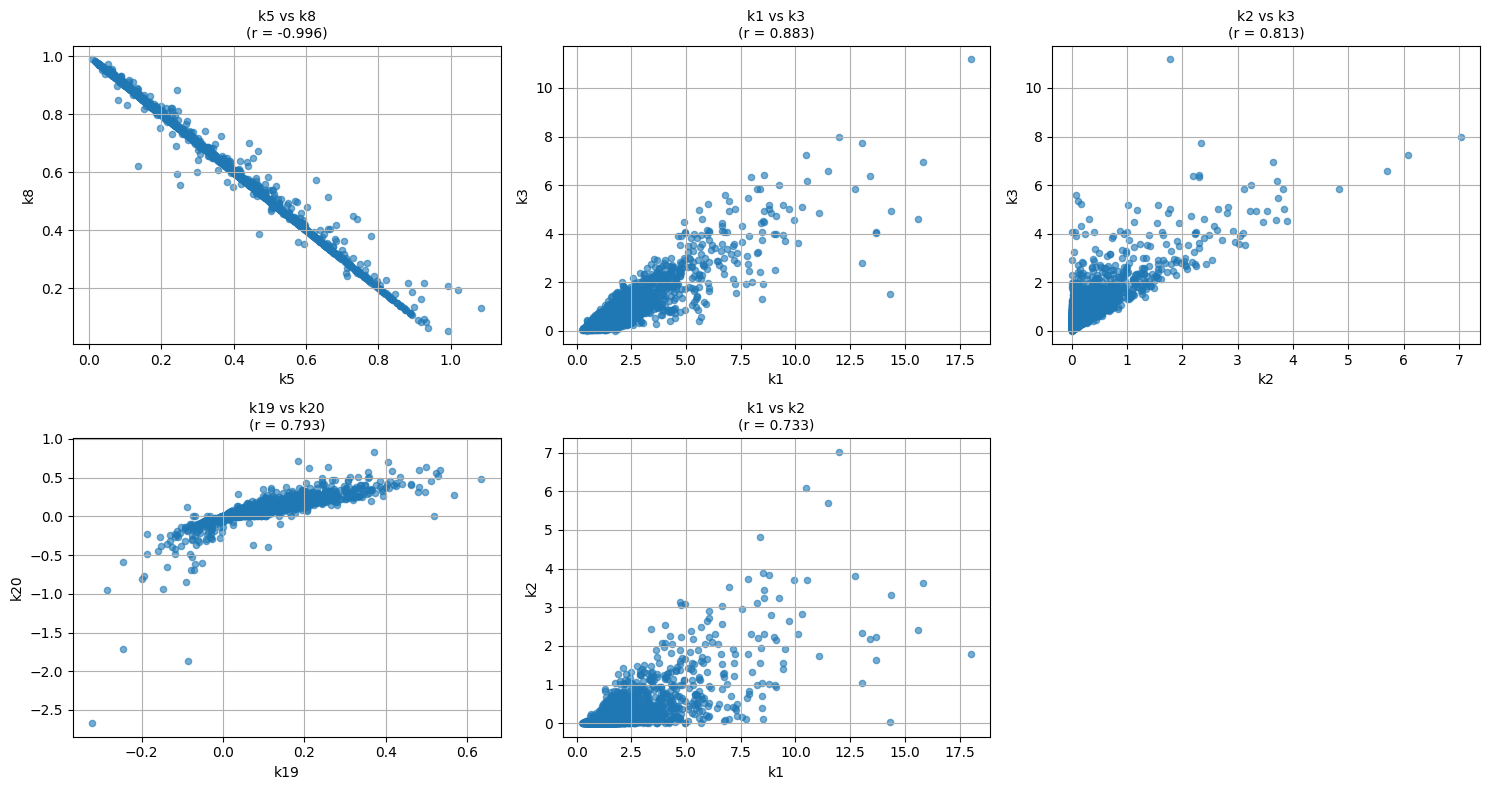

In [8]:
STRONG_THRESHOLD = 0.7

strong_pairs = pairs_df[pairs_df['abs_r'] >= STRONG_THRESHOLD]
if strong_pairs.empty:
    print(f'Сильно коррелирующие пары (|r| >= {STRONG_THRESHOLD}) не обнаружены.')
else:
    import math
    ncols = 3
    nrows = math.ceil(len(strong_pairs) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = np.array(axes).reshape(-1)

    for i, (_, row) in enumerate(strong_pairs.iterrows()):
        xcol, ycol, r = row['feature_x'], row['feature_y'], row['r']
        ax = axes[i]
        ax.scatter(numeric_df[xcol], numeric_df[ycol], alpha=0.6, s=20)
        ax.set_title(f'{xcol} vs {ycol}\n(r = {r:.3f})', fontsize=10)
        ax.set_xlabel(xcol)
        ax.set_ylabel(ycol)
        ax.grid(True)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


-   Сильные корреляции подтверждаются визуально: для всех пар точки располагаются вдоль линии тренда.
    
-   Пары `k1–k2–k3` и `k19–k20` образуют группы близких по смыслу признаков.
    
-   Пара `k5–k8` полностью избыточна (один из показателей можно исключить).

## Общие выводы

    
-   **Описательные статистики.** Большинство признаков имеют **большой разброс** и **правостороннюю асимметрию** (среднее > медианы). Встречаются отрицательные значения у `k4`, `k18–k20` (похоже на нормированные показатели). Яркие «широкие» признаки: `k9`, `k15`, `k16`, **аномально хвостатый** `k17`.
    
-   **Распределения.** По гистограммам видно:
    
    -   Преобладают асимметричные распределения с длинным правым хвостом.
        
    -   Почти нормальные/колоколоподобные: `k4`, `k8`, `k13`, `k18–k20`.
        
    -   `k17` содержит редкие, но очень большие значения; для читаемости использовали усечение по 99-му перцентилю - требуется доп. проверка источника или масштабов.
        
-   **Корреляции Пирсона.**
    
    -   **Сильные положительные:** `k1–k3 (0.883)`, `k2–k3 (0.813)`, `k1–k2 (0.733)`, `k19–k20 (0.793)` - кластеры схожих показателей.
        
    -   **Сильная отрицательная:** `k5–k8 (−0.996)` - практически дубликаты с обратным знаком.
        
    -   **Умеренные:** `k1–k9`, `k3–k9`, `k13–k19`, `k15–k16`, `k18–k19/20` и др.
        
    -   `empl_num` и `year` почти ни с чем не связаны (слабые |r|).
        
-   **Визуальная проверка (scatter).** Для сильных пар точки лежат вдоль линии тренда; особенно очевидно для `k5–k8`. Связи подтверждаются графически.
            
-   **Итог:** данные информативны, но неоднородны по масштабу и форме распределений; есть несколько тесно связанных показателей и один явный «проблемный» признак (`k17`). После нормализации, обработки выбросов и отбора признаков набор подходит для дальнейшего статистического анализа и построения моделей.
